In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# EX 1

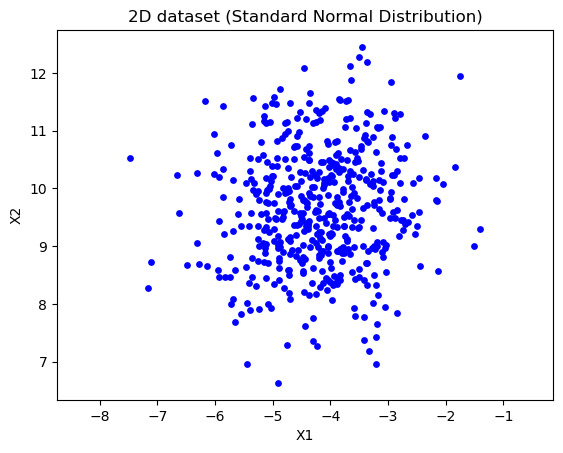

In [15]:

x,_ = make_blobs(
    n_samples=500,
    n_features=2,
    centers=1,
    cluster_std=1.0,
    random_state=9000
)

plt.scatter(x[:, 0], x[:, 1], s=15, color='blue')
plt.title("2D dataset (Standard Normal Distribution)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.show()

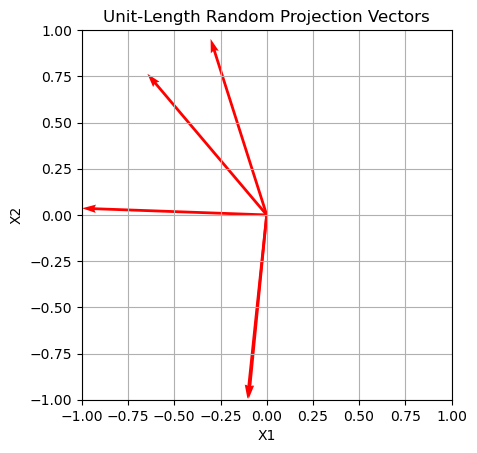

In [16]:
rng = np.random.default_rng(9000)

projection_vectors = rng.multivariate_normal(
    mean=[0,0],
    cov = [[1,0],[0,1]],
    size = 5
)
projection_vectors = projection_vectors / np.linalg.norm(projection_vectors,axis=1)[:,np.newaxis]

origin = np.zeros((5, 2))
plt.quiver(
    origin[:, 0], origin[:, 1],
    projection_vectors[:, 0], projection_vectors[:, 1],
    angles='xy', scale_units='xy', scale=1, color='red'
)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Unit-Length Random Projection Vectors")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


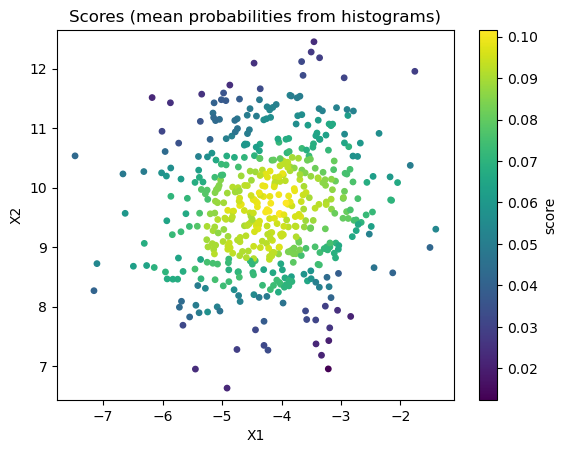

In [50]:

# y = X * W
y = (projection_vectors @ x.T)

def make_hist_with_probs(y, bins=30, pad_ratio=0.1):
    y_min, y_max = np.min(y), np.max(y)

    # Get a bigger range
    range = y_max - y_min
    lo = y_min - pad_ratio * range
    hi = y_max + pad_ratio * range

    counts, bin_edges = np.histogram(y, bins=bins, range=(lo, hi))
    probs = counts.astype(float) / y.size
    return bin_edges, probs

histograms = [make_hist_with_probs(y[i], bins=30, pad_ratio=0.15) for i in range(5)]

def bin_prob_for_sample(x, w, bin_edges, probs):
    y = float(np.dot(x, w))
    idx = np.searchsorted(bin_edges, y, side='right') - 1

    # return 0 probability in case the index exceeds the bins
    if idx < 0 or idx >= len(probs):
        return 0.0
    return probs[idx]


def anomaly_score_mean_prob(x,histograms):
    ps = []
    for i in range(5):
        bin_edges, probs = histograms[i]
        p = bin_prob_for_sample(x, projection_vectors[i], bin_edges, probs)
        ps.append(p)
    return float(np.mean(ps))

scores = np.array([anomaly_score_mean_prob(xx,histograms) for xx in x])


plt.scatter(x[:, 0], x[:, 1], c=scores, s=15)
plt.title("Scores (mean probabilities from histograms)")
plt.xlabel("X1"); plt.ylabel("X2"); plt.axis('equal'); plt.colorbar(label="score")
plt.show()


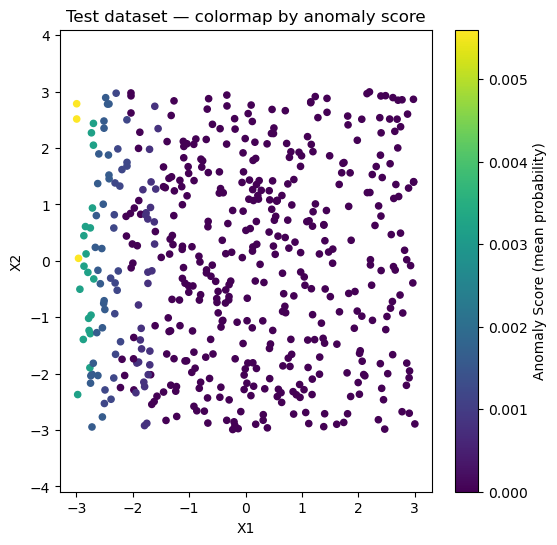

In [51]:
x_test = rng.uniform(low=-3,high=3,size=(500,2))
scores_test = np.array([anomaly_score_mean_prob(x,histograms) for x in x_test])

plt.figure(figsize=(6, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=scores_test, cmap='viridis', s=20)
plt.colorbar(label='Anomaly Score (mean probability)')
plt.title("Test dataset — colormap by anomaly score")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.show()

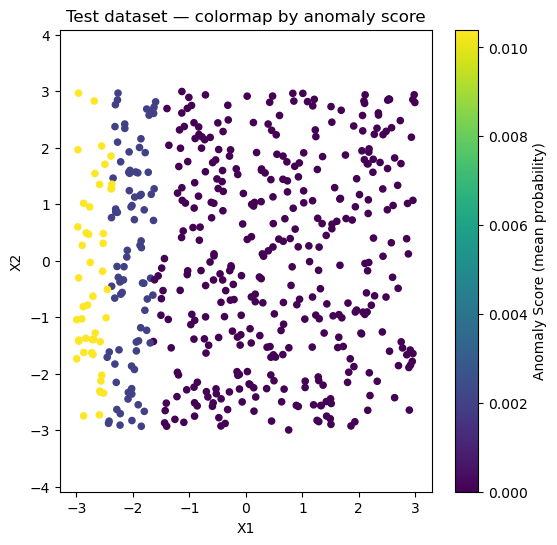

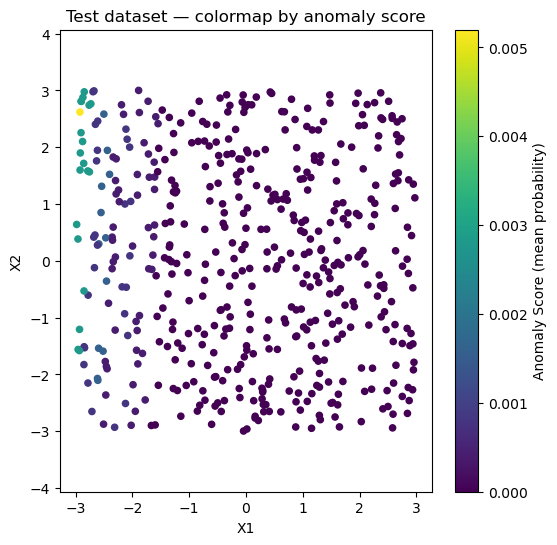

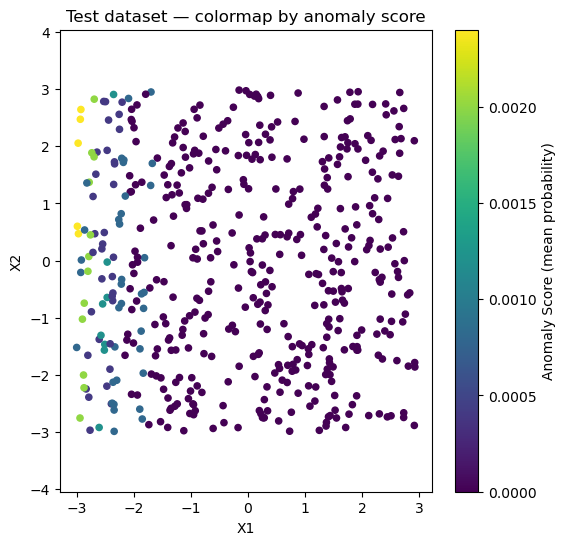

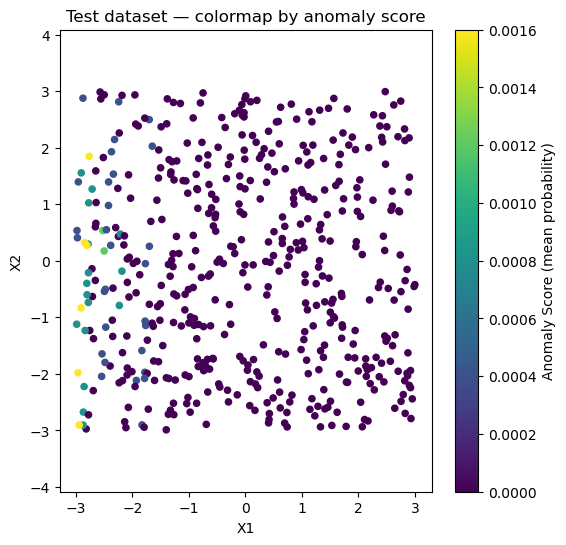

In [55]:
for num_bins in [10,40,70,100]:
    histograms = [make_hist_with_probs(y[i], bins=num_bins, pad_ratio=0.15) for i in range(5)]

    x_test = rng.uniform(low=-3,high=3,size=(500,2))
    scores_test = np.array([anomaly_score_mean_prob(x,histograms) for x in x_test])

    plt.figure(figsize=(6, 6))
    plt.scatter(x_test[:, 0], x_test[:, 1], c=scores_test, cmap='viridis', s=20)
    plt.colorbar(label='Anomaly Score (mean probability)')
    plt.title("Test dataset — colormap by anomaly score")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.axis('equal')
    plt.show()

